Daniel Lin 322594508

(np.float64(-0.5), np.float64(747.5), np.float64(627.5), np.float64(-0.5))

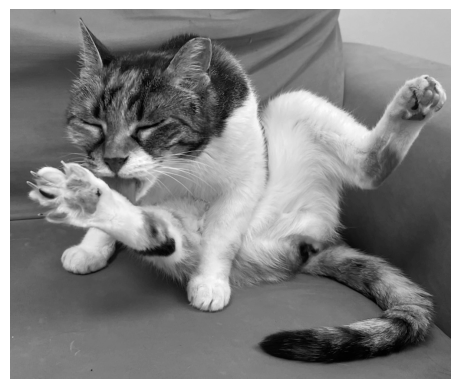

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

Q1.1

In [19]:
def manual_convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width))
    padded_image[pad_height:pad_height + image_height, pad_width:pad_width + image_width] = image

    output_image = np.zeros_like(image, dtype=np.float64)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output_image[i, j] = np.sum(region * kernel)

    return output_image

Q1.2.a

In [22]:
box_3 = np.ones((3, 3)) / 9
box_5 = np.ones((5, 5)) / 25
box_7 = np.ones((7, 7)) / 49

result_box_3 = manual_convolution(image, box_3)
result_box_5 = manual_convolution(image, box_5)
result_box_7 = manual_convolution(image, box_7)

Q1.2.b

In [23]:
def gaussian_kernel(size, sigma):
    distances_from_center = np.linspace(-(size // 2), size // 2, size)
    horizontal_distance_from_center, vertical_distance_from_center = np.meshgrid(distances_from_center, distances_from_center)

    horizontal_distance_squared = horizontal_distance_from_center ** 2
    vertical_distance_squared = vertical_distance_from_center ** 2

    distance_from_center_squared = (horizontal_distance_squared + vertical_distance_squared)
    denominator = 2 * (sigma ** 2)
    kernel = np.exp(-distance_from_center_squared / denominator)

    return kernel / np.sum(kernel)

gauss_3 = gaussian_kernel(3, 0.8)
gauss_5 = gaussian_kernel(5, 1)
gauss_7 = gaussian_kernel(7, 1.2)

result_gauss_3 = manual_convolution(image, gauss_3)
result_gauss_5 = manual_convolution(image, gauss_5)
result_gauss_7 = manual_convolution(image, gauss_7)

Q1.2.c

In [ ]:
basic_sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float64)

sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float64)

sobel_y_kernel = np.array([
    [-1, -2, -1],
    [0,  0,  0],
    [1,  2,  1]
], dtype=np.float64)

result_sharpen = manual_convolution(image, basic_sharpen_kernel)
result_sobel_x = manual_convolution(image, sobel_x_kernel)
result_sobel_y = manual_convolution(image, sobel_y_kernel)
